In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [43]:
df=pd.read_csv("heart.csv")

In [44]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [45]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [46]:
df.duplicated().sum()

np.int64(1)

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
x=df.drop('target',axis=1)
y=df['target']

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=20)


In [58]:
# Initialize and train the Logistic Regression model
model=LogisticRegression()
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
# Make predictions on the test data
y_pred=model.predict(x_test)

In [60]:
# Generate a classification report to evaluate the model
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.65      0.87      0.74        23\n           1       0.90      0.71      0.79        38\n\n    accuracy                           0.77        61\n   macro avg       0.77      0.79      0.77        61\nweighted avg       0.80      0.77      0.77        61\n'

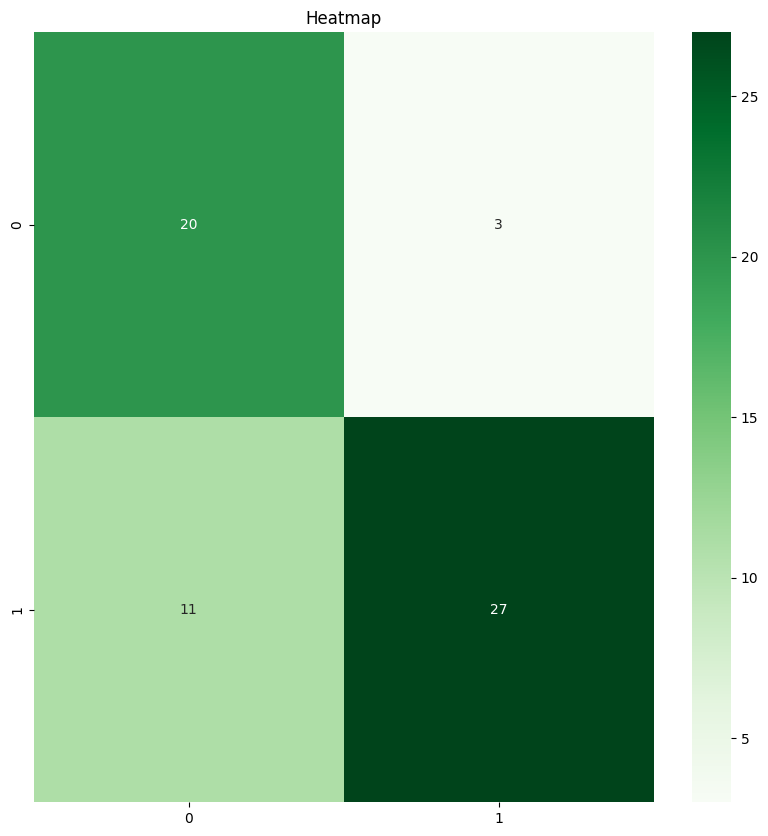

In [61]:
# Visualize the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap="Greens")
plt.title("Heatmap")
plt.show()

In [54]:
# Create a numpy array with new data for prediction
# The values represent the features of a person (excluding the target variable)
new_data=np.array([[300,68,1,0,144,193,1,1,141,0,1.2,1,0,3]])

In [55]:
# Predict the target variable for the new data
# We use all columns except the last one (which would be the target)
prediction=model.predict(new_data[:,:-1])
# Check the prediction and print the result
if prediction[0] == 1:
    print("🫀 The person is likely to have heart disease.")
else:
    print("✅ The person is unlikely to have heart disease.")

✅ The person is unlikely to have heart disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [56]:
# Create another numpy array with new data for prediction
# The values represent the features of a person (excluding the target variable)
new_dat=np.array([[302,57,0,1,130,236,0,0,174,0,0.0,1,1,2]])

In [57]:
# Predict the target variable for the new data
# We use all columns except the last one (which would be the target)
prediction=model.predict(new_dat[:,:-1])
# Check the prediction and print the result
if prediction[0] == 1:
    print("🫀 The person is likely to have heart disease.")
else:
    print("✅ The person is unlikely to have heart disease.")

✅ The person is unlikely to have heart disease.


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
